In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import time
from scipy.optimize import minimize, differential_evolution
import math


# 7

1. Методом случайного поиска найти минимальное значение функции $f$ на множестве $ A = \{x_1, x_2 : x_1^2 + x_2^2 \leq 1\} $, где
$$
f(x_1, x_2) = x_1^3 \sin \frac{1}{x_1} + 10x_1x_2^4 \cos \frac{1}{x_2}, \quad x_1, x_2 \neq 0
$$
При $x_1 = 0$ или $x_2 = 0$ функция доопределяется по непрерывности.

2. Методом имитации отжига найти минимальное значение функции Розенброка $g$ в пространстве $\mathbb{R}^2$, где
$$
g(x) = (x_1 - 1)^2 + 100(x_2 - x_1^2)^2
$$

3. Оценить точность и сравнить результаты со стандартными методами оптимизации.


## 7.1

Методом случайного поиска найти минимальное значение функции $f$ на множестве $ A = \{x_1, x_2 : x_1^2 + x_2^2 \leq 1\} $, где
$$
f(x_1, x_2) = x_1^3 \sin \frac{1}{x_1} + 10x_1x_2^4 \cos \frac{1}{x_2}, \quad x_1, x_2 \neq 0
$$
При $x_1 = 0$ или $x_2 = 0$ функция доопределяется по непрерывности.


Особенности поведения функции:
При $ x_1 \to 0$ и $ x_2 \to 0$ функция стремится к 0. Таким образом, функция $ f(x_1, x_2) $ является непрерывной на множестве $ A $.

Для поиска минимума функции используется метод случайной генерации точек внутри множества $ A $. Генерация точек выполнена cразу в круге $ A $ с использованием полярных координат.


In [2]:
def f(x1, x2):
    return x1**3 * np.sin(1/x1) + 10 * x1 * x2**4 * np.cos(1/x2)

n = 1000000

ang = np.random.uniform(0, 2 * np.pi, n)
r = np.sqrt(np.random.uniform(0, 1, n))

values = f(r * np.cos(ang), r * np.sin(ang))
min_value = np.min(values)

print("Минимальное значение f(x_1, x_2):", min_value)

Минимальное значение f(x_1, x_2): -1.2872205145692281


In [3]:
x1_random = r * np.cos(ang)
x2_random = r * np.sin(ang)

values = np.array([f(x1, x2) for x1, x2 in zip(x1_random, x2_random)])
min_value_random = np.min(values)
min_index = np.argmin(values)
x1_min_random, x2_min_random = x1_random[min_index], x2_random[min_index]

print("Метод случайного поиска:")
print(f"Минимальное значение f(x_1, x_2): {min_value_random:.12f}")
print(f"В точке: x_1 = {x1_min_random:.6f}, x_2 = {x2_min_random:.6f}")


Метод случайного поиска:
Минимальное значение f(x_1, x_2): -1.287220514569
В точке: x_1 = -0.364966, x_2 = 0.930962


In [4]:
def f(x):
    x1, x2 = x
    if x1 == 0 or x2 == 0:
        return 0
    return x1**3 * np.sin(1 / x1) + 10 * x1 * x2**4 * np.cos(1 / x2)

def constraint_circle(x):
    return x[0]**2 + x[1]**2 <= 1

bounds = [(-1, 1), (-1, 1)]

def is_within_bounds(x):
    return x[0]**2 + x[1]**2 <= 1

def constrained_f(x):
    if is_within_bounds(x):
        return f(x)
    else:
        return np.inf

result_de = differential_evolution(constrained_f, bounds, strategy='best1bin', maxiter=1000, tol=1e-6)

print("Метод дифференциальной эволюции:")
print(f"Минимальное значение f(x_1, x_2): {result_de.fun:.12f}")
print(f"В точке: x_1 = {result_de.x[0]:.6f}, x_2 = {result_de.x[1]:.6f}")
print(f"Успешность выполнения: {result_de.success}")


Метод дифференциальной эволюции:
Минимальное значение f(x_1, x_2): -1.288489070843
В точке: x_1 = -0.357406, x_2 = -0.933949
Успешность выполнения: True


/opt/anaconda3/envs/global_env/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Оценка точности:

1. Разница в минимальных значениях функции: $ |f_{\text{de}} - f_{\text{random}}| = 0.000635 $, что указывает на высокую близость результатов.

2. Число итераций:
   - Метод случайного поиска: $ 10^6 $ случайных точек.
   - Метод дифференциальной эволюции: значительно меньшее число итераций (по умолчанию 1000).

3. Время выполнения:
   - Метод случайного поиска требует больше времени из-за необходимости проверки значений на большом числе случайных точек.
   - Метод дифференциальной эволюции достигает результата быстрее благодаря оптимизированному алгоритму.

4. Сходимость к глобальному минимуму:
   - Оба метода находят значения, близкие к глобальному минимуму.
   - Метод дифференциальной эволюции показал более точное значение.


## 7.2 и 7.3

Методом имитации отжига найти минимальное значение функции Розенброка $g$ в пространстве $\mathbb{R}^2$, где
$$
g(x) = (x_1 - 1)^2 + 100(x_2 - x_1^2)^2
$$

 Основные шаги алгоритма

1. Параметры:
   - $ m $ — коэффициент охлаждения.
   - $ \sigma $ — масштаб случайного поиска.
   - $ t_0 $ — начальная температура.
   - $ (x_0, y_0) $ — начальное приближение.

2. Генерация нового кандидата:
   Положение следующего кандидата $(x_{k+1}, y_{k+1})$ определяется с помощью нормального распределения:

   $$
   (x_{k+1}, y_{k+1}) \sim \mathcal{N}(x_k, t_k \sigma^2), \quad \mathcal{N}(y_k, t_k \sigma^2)
   $$

   Изменение (прирост) функции вычисляется как:

   $$
   \Delta g = g(x_{k+1}, y_{k+1}) - g(x_k, y_k),
   $$

   где $ g $ — целевая функция.

3. Условие перехода:
   - Если $\Delta g < 0$, новый кандидат принимается.
   - В противном случае, шаг совершается с вероятностью:

   $$
   p_k = \frac{1}{2} \exp\left(-\frac{\Delta g}{t_k}\right).
   $$

4. Обновление температуры:
   - Температура понижается по закону:

   $$
   t_{k+1} = t_k \frac{m}{1 + 0.1 |\Delta g|^{1/2}}.
   $$

5. Критерий остановки:
   Алгоритм прекращает выполнение, если:
   - Температура $ t_k $ достигает малых значений.
   - Изменение функции $|\Delta g|$ становится меньше заданного порога.

---
Целевая функция, которую необходимо минимизировать, — **функция Розенброка**:

$$
g(x) = (x_1 - 1)^2 + 100 (x_2 - x_1^2)^2.
$$

Глобальный минимум достигается в точке $ (x_1, x_2) = (1, 1) $, где $ g(x) = 0 $.

In [5]:
def rosenbrock(x):
    return (x[0] - 1)**2 + 100 * (x[1] - x[0]**2)**2

def simulated_annealing(m, sigma, t0, x0, y0, max_iter=100000):
    x, y = x0, y0
    t = t0
    best_x, best_y = x, y
    best_g = rosenbrock([x, y])
    history = [(x, y, best_g)]

    for k in range(max_iter):
        x_new = x + np.random.uniform(-sigma, sigma) * t
        y_new = y + np.random.uniform(-sigma, sigma) * t
        g_new = rosenbrock([x_new, y_new])
        delta_g = g_new - rosenbrock([x, y])
        
        if delta_g < 0 or np.random.rand() < np.exp(-delta_g / t):
            x, y = x_new, y_new

        if g_new < best_g:
            best_x, best_y, best_g = x_new, y_new, g_new

        t = t * m
        history.append((x, y, g_new))
        
        if abs(delta_g) < 1e-12:
            break
    
    return best_x, best_y, best_g, history, k

In [6]:
m = 0.995
sigma = 2.7
t0 = 2
x0, y0 = 2, 2

start_time_sa = time.time()
results = []

for i in range(5):
    x_min, y_min, g_min, history, n = simulated_annealing(m, sigma, t0, x0, y0)
    results.append((x_min, y_min, g_min))
end_time_sa = time.time()

best_result = min(results, key=lambda r: r[2])
print("Метод имитации отжига:")
print(f"Минимум функции Розенброка найден в точке: x = {best_result[0]:.6f}, y = {best_result[1]:.6f}")
print(f"Значение функции в минимуме: g = {best_result[2]:.12f}")
print(f"Число итераций: {n}")
print(f"Время выполнения: {end_time_sa - start_time_sa:.6f} секунд\n")

# метод BFGS
start_time_bfgs = time.time()
res = minimize(rosenbrock, [x0, y0], method='BFGS')
end_time_bfgs = time.time()

print("Метод оптимизации BFGS:")
print(f"Минимум функции найден в точке: x = {res.x[0]:.6f}, y = {res.x[1]:.6f}")
print(f"Значение функции в минимуме: g = {res.fun:.12f}")
print(f"Число итераций: {res.nit}")
print(f"Время выполнения: {end_time_bfgs - start_time_bfgs:.6f} секунд\n")



Метод имитации отжига:
Минимум функции Розенброка найден в точке: x = 0.996695, y = 0.993384
Значение функции в минимуме: g = 0.000010950175
Число итераций: 4147
Время выполнения: 0.071002 секунд

Метод оптимизации BFGS:
Минимум функции найден в точке: x = 0.999996, y = 0.999991
Значение функции в минимуме: g = 0.000000000019
Число итераций: 30
Время выполнения: 0.005396 секунд



1. Точность решений:

- Метод BFGS находит минимум функции Розенброка с высокой точностью и значительно быстрее. Это ожидаемо, так как BFGS является градиентным методом оптимизации, специально разработанным для задач с гладкими функциями, такими как функция Розенброка.
- Метод имитации отжига также находит приближение к глобальному минимуму, но с меньшей точностью из-за случайной природы поиска.

2. Время выполнения:

- BFGS выполняется значительно быстрее из-за детерминированного характера и использования информации о градиентах.
- Имитация отжига требует больше времени, так как исследует пространство решений случайным образом и выполняет больше итераций.

3. Число итераций:

- Метод BFGS использует меньшее количество итераций для достижения сходимости.
- Метод имитации отжига требует гораздо больше итераций для приближения к оптимальному решению.

# 8

Применить метод Монте-Карло к решению первой краевой задачи для двумерного уравнения Лапласа в единичном круге:
$$
\begin{cases}
    \Delta u = 0, \quad (x,y) \in D = \{x, y: x^2+y^2 \leq 1\}, \\
    u|_{\partial D} = f(x, y), \\
    u\in C^2(D), \quad f\in C(\partial D), \\
\end{cases}
$$
Для функции $f(x, y) = x^2-y^2$ найти аналитическое решение и сравнить с полученным по методу Монте-Карло.

Метод Монте-Карло — это статистический метод, который используется для приближенного решения уравнений, таких как уравнение Лапласа. В данном случае метод применяется для оценки значений функции внутри области $ D $ с помощью случайного блуждания.

Алгоритм решения:

1. Построение сетки и определение точек
    Первым шагом является построение равномерной сетки на области $ [-1, 1] \times [-1, 1] $ с шагом $ \varepsilon $. После этого мы определяем, какие точки лежат внутри единичного круга, то есть удовлетворяют неравенству:

    $$
    x^2 + y^2 \leq 1
    $$

2. Определение граничных и внутренних точек
    - Граничные точки: Это точки, которые лежат внутри круга, но имеют хотя бы одного соседа вне круга. Они определяются как точки, для которых хотя бы один из соседей находится за пределами круга.
    - Внутренние точки: Это точки, все соседи которых также лежат внутри круга.

3. Моделирование случайного блуждания

    - Для каждой внутренней точки мы запускаем частицу, которая выполняет случайное блуждание. На каждой итерации частица может с равной вероятностью перемещаться в одну из четырех соседних точек: влево, вправо, вверх или вниз. Частица продолжает движение до тех пор, пока не достигнет границы круга. Для внутренних точек значение функции можно вычислить с помощью разностной схемы:

        $$
        u(P) = \frac{1}{4} (u(P_1) + u(P_2) + u(P_3) + u(P_4)),
        $$

        где $ P_1, P_2, P_3, P_4 $ — это соседи точки $ P $ на сетке.

    - Как только частица попадает на границу, она останавливается. Мы фиксируем температуру, соответствующую значению функции на границе, и повторяем процесс для множества частиц. Среднее значение этих температур будет приближением функции в данной внутренней точке. Для граничных точек значение функции задается непосредственно через граничное условие:

        $$
        u(Q) = f(Q),
        $$

        где $ Q $ — это граничная точка.

4. Численное решение

    Значение функции в каждой внутренней точке приближается через среднее значение функции на границе, которое получаем путем многократных запусков частиц. Для каждой граничной точки функция принимает значение $ f(x, y) = x^2 - y^2 $, как задано в условиях задачи.

5. Аналитическое решение

    Аналитическое решение задачи для функции $ f(x, y) = x^2 - y^2 $ вычисляется непосредственно:

    $$
    u(x, y) = x^2 - y^2.
    $$

    Таким образом, аналитическое решение совпадает с граничным условием и позволяет проверить корректность численного метода.
---

Числовое приближение температуры $ T(x, y) $ в каждой точке области можно выразить как среднее значение функции на границе для всех частиц, достигших этой точки:

$$
T(x, y) = \frac{1}{N} \sum_{i=1}^{N} f(x_i, y_i),
$$

где $ N $ — количество частиц, достигших границы круга, и $ f(x_i, y_i) $ — значение функции на границе для каждой частицы.

---

Метод Монте-Карло позволяет эффективно решать задачу Лапласа в круге с помощью случайного блуждания. Этот метод особенно полезен, когда точные аналитические решения трудны или невозможны для применения. Использование статистических методов позволяет нам приближенно оценивать значения функции внутри области, что делает метод Монте-Карло удобным инструментом для решения подобных задач.


In [7]:
def boundary(x, y):
    return x**2 - y**2

def in_circle(x, y):
    return x**2 + y**2 <= 1

def random_walk(x_start, y_start, h, max_steps=100):
    x, y = x_start, y_start
    steps = np.array([[-h, 0], [h, 0], [0, -h], [0, h]])
    step_count = 0
    while in_circle(x, y):
        step = steps[np.random.choice(steps.shape[0])]
        x_new, y_new = x + step[0], y + step[1]
        if in_circle(x_new, y_new):
            x, y = x_new, y_new
        else:
            break
    return x, y

def monte_carlo(grid_size, num_particles, h):
    x = np.linspace(-1, 1, grid_size)
    y = np.linspace(-1, 1, grid_size)
    X, Y = np.meshgrid(x, y)

    mask = X**2 + Y**2 <= 1
    temperatures = np.zeros((grid_size, grid_size))
    counts = np.zeros((grid_size, grid_size))

    px = np.random.uniform(-1, 1, num_particles)
    py = np.random.uniform(-1, 1, num_particles)

    mask_p = (px**2 + py**2 <= 1)

    px = px[mask_p]
    py = py[mask_p]

    for x_start, y_start in zip(px, py):
        x_boundary, y_boundary = random_walk(x_start, y_start, h)
        temp = boundary(x_boundary, y_boundary)

        ix = np.digitize(x_start, x) - 1
        iy = np.digitize(y_start, y) - 1

        if mask[iy, ix]:
            temperatures[iy, ix] += temp
            counts[iy, ix] += 1

    mask_nonzero = counts > 0
    temperatures[mask_nonzero] /= counts[mask_nonzero]

    return X, Y, temperatures, mask


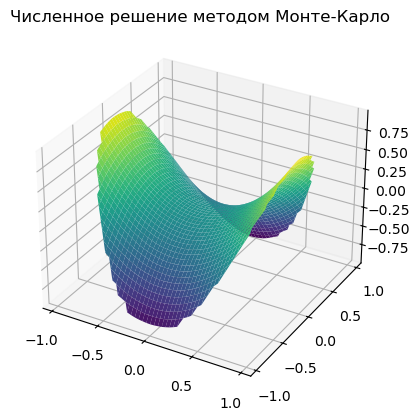

In [8]:
size = 50
num_p = 1000000 
h = 8 

X, Y, temp, inside_circle_mask = monte_carlo(size, num_p, h)

masked_temp = np.where(inside_circle_mask, temp, np.nan)
masked_X = np.where(inside_circle_mask, X, np.nan)
masked_Y = np.where(inside_circle_mask, Y, np.nan)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(masked_X, masked_Y, masked_temp, cmap="viridis")
ax.set_title("Численное решение методом Монте-Карло")
plt.show()

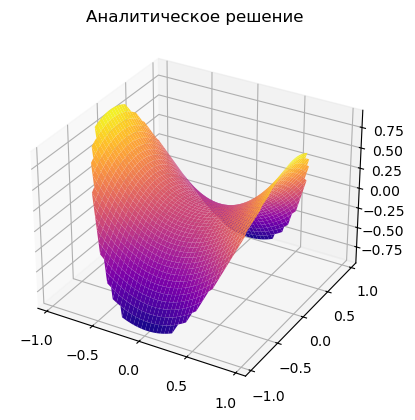

In [9]:
analytical_solution = X**2 - Y**2
masked_analytical_solution = np.where(inside_circle_mask, analytical_solution, np.nan)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(masked_X, masked_Y, masked_analytical_solution, cmap='plasma')
ax.set_title("Аналитическое решение")
plt.show()

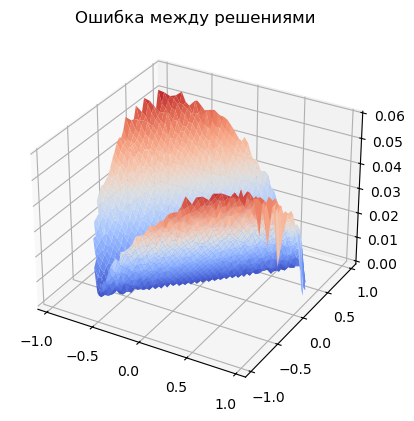

In [10]:
error = np.abs(masked_temp- masked_analytical_solution)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(masked_X, masked_Y, error, cmap='coolwarm')
ax.set_title("Ошибка между решениями")
plt.show()

# 9

Рассмотреть два вида гауссовских процессов:

- Винеровский процесс $ W(t), t \in [0; 1], W(0) = 0 $

- Процесс Орнштейна–Уленбека $ X(t), t \in [0; 1], X(0) = X_0 $, т.е. стационарный марковский гауссовский процесс. Начальные значения $ X_0 $ следует выбирать случайным образом так, чтобы полученный процесс был стационарным.

Для данных процессов:

1. Найти ковариационную функцию и переходные вероятности.
2. Промоделировать независимые траектории процесса с данными переходными вероятностями методом добавления разбиения отрезка.
3. Построить график траектории, не соединяя точки ломаной, с целью получения визуально непрерывной линии.


1. Найти ковариационную функцию и переходные вероятности.

Винеровский процесс $ W(t) $ — это стандартный процесс броуновского движения, определяемый следующими свойствами:

1. $ W(0) = 0 $.
2. Приращения процесса независимы: $ W(t) - W(s) \sim N(0, t-s) $, где $ s < t $.
3. Процесс непрерывен.

Ковариационная функция Винеровского процесса определяется как математическое ожидание произведения \( W(s) \) и \( W(t) \):
$$
R(s, t) = \mathbb{E}[W(s) W(t)].
$$

Рассмотрим два случая:
- Если $ s \leq t $, то $ W(t) = W(s) + (W(t) - W(s)) $, где $ W(t) - W(s) $ независим от $ W(s) $. Таким образом:
  $$
  \mathbb{E}[W(s) W(t)] = \mathbb{E}[W(s)^2] = s.
  $$
- Если $ t \leq s $, аналогично $ \mathbb{E}[W(s) W(t)] = t $.

Итоговая формула ковариационной функции:
$$
R(s, t) = \min(s, t).
$$

Процесс Орнштейна–Уленбека $ X(t) $ — это стационарный, марковский гауссовский процесс, описываемый следующими уравнениями:

- Уравнение дифференциальной системы: 
$$
dX(t) = -\theta X(t) dt + \sigma dW(t),
$$
где $ \theta > 0 $ — коэффициент скорости возврата, а $ \sigma > 0 $ — интенсивность шума.

- Стационарность:
    - Математическое ожидание:
        $$
        \mathbb{E}[X(t)] = 0,
        $$
    - Ковариационная функция зависит только от разности $ \tau = |t_2 - t_1| $:
        $$
        R(t_1, t_2) = \mathbb{E}[X(t_1) X(t_2)].
        $$

    - Рассмотрим уравнение $ X(t) $: его стационарное распределение — это нормальное распределение с дисперсией $ \sigma^2 / (2\theta) $. Для двух моментов времени $ t_1 $ и $ t_2 $, ковариационная функция имеет вид:
        $$
        R(t_1, t_2) = \frac{\sigma^2}{2\theta} e^{-\theta |t_2 - t_1|}.
        $$

Здесь используется экспоненциальный спад ковариации с увеличением расстояния между $ t_1 $ и $ t_2 $.


In [11]:
def wiener_cov(s, t):
    return min(s, t)

def ornstein_uhlenbeck_cov(s, t, theta=1.0, sigma=1.0):
    return (sigma ** 2 / (2 * theta)) * np.exp(-theta * abs(t - s))

In [12]:
num_p = 5
t = np.linspace(0, 1, num_p)

wiener_cov = np.array([[wiener_cov(s, t_i) for t_i in t] for s in t])
ou_cov = np.array([[ornstein_uhlenbeck_cov(s, t_i) for t_i in t] for s in t])

print("Wiener Process Covariance Matrix:")
print(wiener_cov)

print("\nOrnstein-Uhlenbeck Process Covariance Matrix:")
print(ou_cov)

Wiener Process Covariance Matrix:
[[0.   0.   0.   0.   0.  ]
 [0.   0.25 0.25 0.25 0.25]
 [0.   0.25 0.5  0.5  0.5 ]
 [0.   0.25 0.5  0.75 0.75]
 [0.   0.25 0.5  0.75 1.  ]]

Ornstein-Uhlenbeck Process Covariance Matrix:
[[0.5        0.38940039 0.30326533 0.23618328 0.18393972]
 [0.38940039 0.5        0.38940039 0.30326533 0.23618328]
 [0.30326533 0.38940039 0.5        0.38940039 0.30326533]
 [0.23618328 0.30326533 0.38940039 0.5        0.38940039]
 [0.18393972 0.23618328 0.30326533 0.38940039 0.5       ]]


2. Промоделировать независимые траектории процесса с данными переходными вероятностями методом добавления разбиения отрезка.


Для моделирования Винеровского процесса мы используем конечное разбиение отрезка времени $ [0, 1] $ на $ N $ точек с шагом $ dt = \frac{1}{N} $. Инкременты $ W(t_{i+1}) - W(t_i) $ распределены нормально: 
$$
W(t_{i+1}) - W(t_i) \sim N(0, \sqrt{dt}).
$$

Моделирование:
1. Генерируем массив независимых нормальных приращений с дисперсией $ dt $.
2. Строим траекторию как кумулятивную сумму этих приращений:
   $$
   W(t_k) = \sum_{i=1}^{k} \Delta W_i, \quad W(0) = 0.
   $$

In [13]:
def wiener_process(num_p, num_tr):
    t = np.linspace(0, 1, num_p)
    dt = t[1] - t[0]
    traj = np.zeros((num_tr, num_p))
    
    for i in range(num_tr):
        increments = np.random.normal(0, np.sqrt(dt), num_p - 1)
        traj[i, 1:] = np.cumsum(increments)
    
    return t, traj

Моделирование процесса Орнштейна–Уленбека требует учета дискретного времени и условного распределения:
1. Начальное значение $ X(0) $ выбирается из стационарного распределения:
   $$
   X(0) \sim N(0, \frac{\sigma^2}{2\theta}).
   $$
2. На каждом шаге вычисляются:
   - Среднее значение:
        $$
        \mathbb{E}[X(t_{i+1}) | X(t_i)] = X(t_i) e^{-\theta dt}.
        $$
   - Дисперсия:
        $$
        \text{Var}(X(t_{i+1}) | X(t_i)) = \frac{\sigma^2}{2\theta} (1 - e^{-2\theta dt}).
        $$
3. Следующее значение генерируется как:
   $$
   X(t_{i+1}) = \mathbb{E}[X(t_{i+1}) | X(t_i)] + \sqrt{\text{Var}(X(t_{i+1}) | X(t_i))} \cdot \xi_i,
   $$
   где $ \xi_i \sim N(0, 1) $.

Таким образом, процесс Орнштейна–Уленбека моделируется рекурсивно, начиная с начального значения $ X(0) $.


In [14]:
def ornstein_uhlenbeck(num_p, num_tr, theta=1.0, sigma=1.0):
    t = np.linspace(0, 1, num_p)
    dt = t[1] - t[0]
    traj = np.zeros((num_tr, num_p))

    for i in range(num_tr):
        x0 = np.random.normal(0, np.sqrt(sigma ** 2 / (2 * theta)))
        traj[i, 0] = x0
        for j in range(1, num_p):
            mean = traj[i, j - 1] * np.exp(-theta * dt)
            variance = sigma ** 2 * (1 - np.exp(-2 * theta * dt)) / (2 * theta)
            traj[i, j] = mean + np.random.normal(0, np.sqrt(variance))

    return t, traj

3. Построить график траектории, не соединяя точки ломаной, с целью получения визуально непрерывной линии.

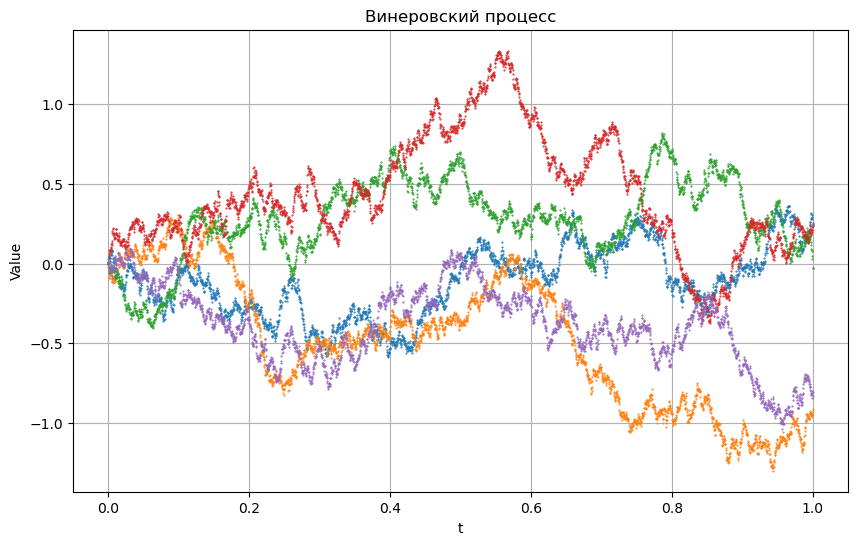

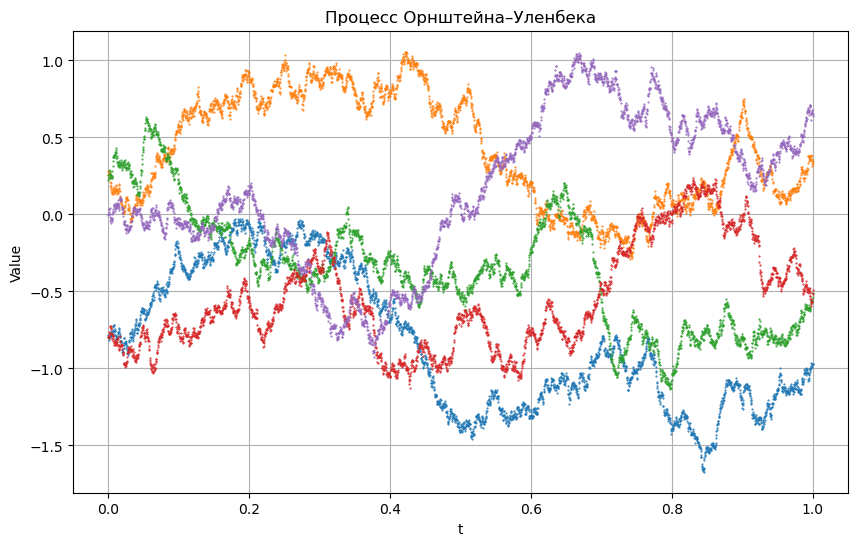

In [15]:
def plot_trajectories(t, traj, title):
    plt.figure(figsize=(10, 6))
    for trajectory in traj:
        plt.plot(t, trajectory, marker="o", linestyle="none", markersize=0.5)
    plt.title(title)
    plt.xlabel("t")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

num_p = 3000
num_tr = 5

t_wiener, wiener_tr = wiener_process(num_p, num_tr)
plot_trajectories(t_wiener, wiener_tr, "Винеровский процесс")

t_ou, ou_trajectories = ornstein_uhlenbeck(num_p, num_tr)
plot_trajectories(t_ou, ou_trajectories, "Процесс Орнштейна–Уленбека")


# 10

Произвести фильтрацию одномерного процесса Орнштейна–Уленбека:

1. Используя генератор белого шума, добавить к реализации процесса Орнштейна–Уленбека случайную ошибку с заранее известной дисперсией.
2. При помощи одномерного фильтра Калмана оценить траекторию процесса по зашумленному сигналу, считая известными параметры шума и процесса.
3. Рассмотреть следующие виды шума:
   1. Гауссов
   2. Коши (шум имеет распределение Коши)


При наблюдении за реальным процессом данные обычно зашумлены. Мы моделируем это добавлением случайного шума $ \eta(t) $:
$$
Y(t) = X(t) + \eta(t),
$$
где:
- $ X(t) $ — истинный OU-процесс,
- $ \eta(t) $ — шум наблюдения.

Цель состоит в восстановлении истинной траектории $ X(t) $ из наблюдений $ Y(t) $.

1. **Гауссов шум:**
   $ \eta(t) \sim N(0, \sigma_\eta^2) $ — шум с нормальным распределением, где $ \sigma_\eta^2 $ — дисперсия шума.

2. **Шум Коши:**
  $ \eta(t) \sim \text{Cauchy}(x_0, \gamma) $, где:
    - $ x_0 $ — центр распределения,
    - $ \gamma $ — параметр масштаба.
    
   Шум Коши имеет тяжелые хвосты и выбросы, что делает задачу фильтрации сложнее.


Фильтр Калмана — это алгоритм для оценки состояния линейной системы с гауссовским шумом наблюдений. Он применяется для восстановления истинного сигнала $ X(t) $.

Фильтр Калмана выполняется в два этапа:
1. **Прогноз:**
   - Прогнозируем состояние на следующий шаг времени:
     $$
     \hat{X}_{k|k-1} = F \hat{X}_{k-1|k-1},
     $$
     где $ F = e^{-\theta \Delta t} $.
   - Прогнозируем дисперсию ошибки:
     $$
     P_{k|k-1} = F^2 P_{k-1|k-1} + Q,
     $$
     где $ Q = \frac{\sigma^2}{2\theta} (1 - e^{-2\theta \Delta t}) $.

2. **Обновление:**
   - Вычисляем коэффициент Калмана:
     $$
     K_k = \frac{P_{k|k-1}}{P_{k|k-1} + R},
     $$
     где $ R = \sigma_\eta^2 $ — дисперсия шума наблюдений.
   - Обновляем оценку состояния:
     $$
     \hat{X}_{k|k} = \hat{X}_{k|k-1} + K_k (Y_k - \hat{X}_{k|k-1}).
     $$
   - Обновляем дисперсию ошибки:
     $$
     P_{k|k} = (1 - K_k) P_{k|k-1}.
     $$




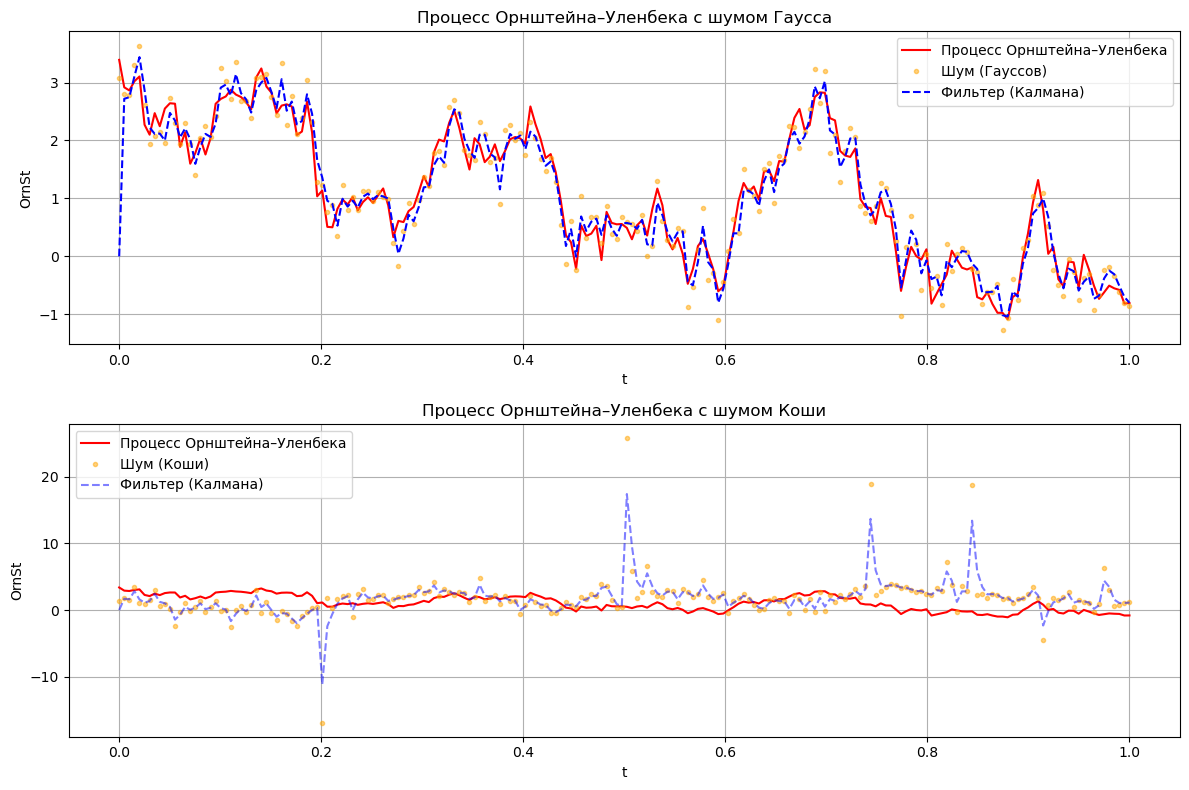

In [16]:
def generate_noisy_ou_process(num_p, theta=1.0, sigma=1.0, noise_std=0.5, noise_type="gaussian"):
    t = np.linspace(0, 1, num_p)
    dt = t[1] - t[0]
    x = np.zeros(num_p)
    x[0] = np.random.normal(0, np.sqrt(sigma**2 / (2 * theta)))

    for i in range(1, num_p):
        mean = x[i - 1] * np.exp(-theta * dt)
        variance = sigma**2 * (1 - np.exp(-2 * theta * dt)) / (2 * theta)
        x[i] = mean + np.random.normal(0, np.sqrt(variance))

    if noise_type == "gaussian":
        noise = np.random.normal(0, noise_std, num_p)
    elif noise_type == "cauchy":
        noise = np.random.standard_cauchy(num_p) * noise_std
    else:
        raise ValueError("Unsupported noise type")

    noisy_x = x + noise
    return t, x, noisy_x

def kalman_filter(noisy_data, dt, theta=1.0, sigma=1.0, noise_std=0.5):
    num_p = len(noisy_data)
    x_filtered = np.zeros(num_p)
    P = np.zeros(num_p)

    x_filtered[0] = 0
    P[0] = sigma**2 / (2 * theta)

    for i in range(1, num_p):
        F = np.exp(-theta * dt)
        Q = sigma**2 * (1 - np.exp(-2 * theta * dt)) / (2 * theta)

        x_pred = F * x_filtered[i - 1]
        P_pred = F**2 * P[i - 1] + Q

        R = noise_std**2 
        K = P_pred / (P_pred + R)

        x_filtered[i] = x_pred + K * (noisy_data[i] - x_pred)
        P[i] = (1 - K) * P_pred

    return x_filtered


num_p = 200
noise_std = 0.3
theta = 4.0
sigma = 5.0

t, true_x, noisy_x_gaussian = generate_noisy_ou_process(num_p, theta, sigma, noise_std, noise_type="gaussian")
t, _, noisy_x_cauchy = generate_noisy_ou_process(num_p, theta, sigma, noise_std, noise_type="cauchy")

filtered_x_gaussian = kalman_filter(noisy_x_gaussian, t[1] - t[0], theta, sigma, noise_std)
filtered_x_cauchy = kalman_filter(noisy_x_cauchy, t[1] - t[0], theta, sigma, noise_std)

plt.figure(figsize=(12, 8))

# для гауссовского шума
plt.subplot(2, 1, 1)
plt.plot(t, true_x, label="Процесс Орнштейна–Уленбека",alpha=1, color="red")
plt.plot(t, noisy_x_gaussian, label="Шум (Гауссов)", linestyle="none", marker=".", alpha=0.5, color="orange")
plt.plot(t, filtered_x_gaussian, label="Фильтер (Калмана)",linestyle="--", color="blue")
plt.legend()
plt.title("Процесс Орнштейна–Уленбека с шумом Гаусса")
plt.xlabel("t")
plt.ylabel("OrnSt")
plt.grid()

# для шума Коши
plt.subplot(2, 1, 2)
plt.plot(t, true_x, label="Процесс Орнштейна–Уленбека", alpha=1, color="red")
plt.plot(t, noisy_x_cauchy, label="Шум (Коши)", linestyle="none", marker=".", alpha=0.5, color="orange")
plt.plot(t, filtered_x_cauchy, label="Фильтер (Калмана)", linestyle="--", alpha=0.5, color="blue")
plt.legend()
plt.title("Процесс Орнштейна–Уленбека с шумом Коши")
plt.xlabel("t")
plt.ylabel("OrnSt")
plt.grid()
plt.tight_layout(rect=[0, 0, 1, 1])


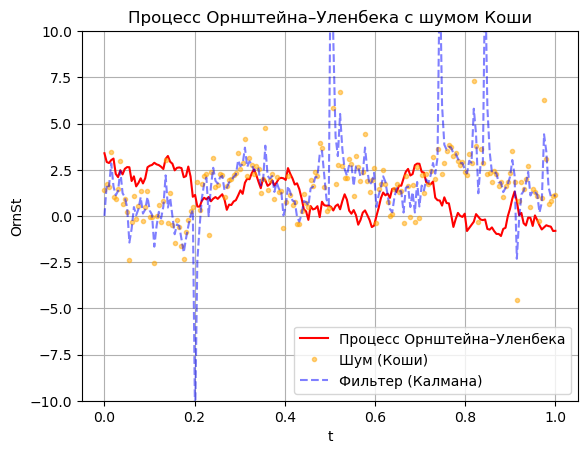

In [17]:
plt.ylim([-10, 10])
plt.plot(t, true_x, label="Процесс Орнштейна–Уленбека", alpha=1, color="red")
plt.plot(t, noisy_x_cauchy, label="Шум (Коши)", linestyle="none", marker=".", alpha=0.5, color="orange")
plt.plot(t, filtered_x_cauchy, label="Фильтер (Калмана)", linestyle="--", alpha=0.5, color="blue")
plt.legend()
plt.title("Процесс Орнштейна–Уленбека с шумом Коши")
plt.xlabel("t")
plt.ylabel("OrnSt")
plt.grid()


# 11

Построить двумерное пуассоновское поле, отвечающее сложному пуассоновскому процессу:

1. Система массового обслуживания.
   Первая координата поля — время поступления заявки в СМО (распределенное равномерно), а вторая — время обслуживания заявки (распределение $ \chi^2 $ с десятью степенями свободы).

2. Система массового обслуживания с циклической интенсивностью $ \lambda(1 + \cos(t)) $ и единичными скачками. 
   При помощи метода Льюиса и Шедлеара, свести задачу моделирования неоднородного пуассоновского процесса к моделированию двумерного пуассоновского поля, где первая координата распределена равномерно, а вторая имеет распределение Бернулли.

3. Работа страховой компании: 
   Первая координата — момент наступления страхового случая (равномерное распределение), вторая — величина ущерба (распределение Парето). Поступление капитала считать линейным по времени со скоростью $ c > 0 $, начальный капитал $ W > 0 $.


## 11.1
Система массового обслуживания (СМО) представляет собой модель, описывающую процесс поступления, обработки и завершения заявок в некоторой системе. Такие системы широко применяются в телекоммуникациях, логистике, здравоохранении и многих других областях.

В данном задании мы исследуем одноканальную СМО, где:
- **Заявки** поступают по пуассоновскому процессу с интенсивностью $\lambda$.
- **Время обслуживания** заявок распределено по закону $\chi^2$ с 10 степенями свободы.
- **Цель** — отследить количество активных заявок в системе во времени.

1. **Пуассоновский процесс:**
   - Число заявок за фиксированный интервал времени распределено по закону Пуассона:
     $$
     P(N = k) = \frac{(\lambda T)^k e^{-\lambda T}}{k!},
     $$
     где $\lambda$ — интенсивность поступления, $T$ — длительность интервала.
   - Времена поступления заявок равномерно распределены внутри интервала $[0, T]$.

2. **Время обслуживания:**
   - Для каждой заявки время обслуживания моделируется из распределения $\chi^2$ с 10 степенями свободы.
   - Плотность вероятности для распределения $\chi^2$:
     $$
     f(x, k) = \frac{x^{k/2 - 1} e^{-x/2}}{2^{k/2} \Gamma(k/2)},
     $$
     где $k$ — число степеней свободы, $\Gamma$ — гамма-функция.

3. **Динамика системы:**
   - Система обслуживает заявки последовательно. Если новая заявка поступает, пока предыдущая ещё не завершена, она становится в очередь.
   - Момент окончания обработки каждой заявки определяется следующим образом:
     $$
     t_{\text{end}, i} = \max(t_{\text{arrival}, i}, t_{\text{end}, i-1}) + \tau_i,
     $$
     где $t_{\text{arrival}, i}$ — время поступления $i$ -й заявки, $\tau_i$ — время её обслуживания.


Моделирование заключается в:
1. Генерации случайных времён поступления заявок $t_{\text{arrival}}$.
2. Генерации случайных времён обслуживания $\tau$.
3. Определении моментов окончания обработки заявок $t_{\text{end}}$, учитывая возможное наложение обработок.
4. Построении временной сетки для анализа состояния системы (количество заявок в очереди) в разные моменты времени.


**Генерация заявок:**
   - Общее число заявок за интервал $T$ определяется как случайная величина из распределения Пуассона:
     $$
     N \sim \text{Poisson}(\lambda T).
     $$
   - Для каждой заявки моделируется время поступления:
     $$
     t_{\text{arrival}, i} \sim \text{Uniform}(0, T).
     $$

**Определение времени обработки:**
   - Для каждой заявки моделируется время обслуживания:
     $$
     \tau_i \sim \chi^2(10).
     $$
   - Моменты окончания обработки вычисляются последовательно:
     $$
     t_{\text{end}, i} = \max(t_{\text{arrival}, i}, t_{\text{end}, i-1}) + \tau_i.
     $$

**Построение временной сетки:**
   - Интервал времени $T$ разбивается на равные части ($\text{grid\_size}$).
   - Для каждого момента времени $t$ подсчитывается количество активных заявок:
     $$
     Q(t) = \sum_{i=1}^N \mathbb{1}(t_{\text{arrival}, i} \leq t < t_{\text{end}, i}).
     $$


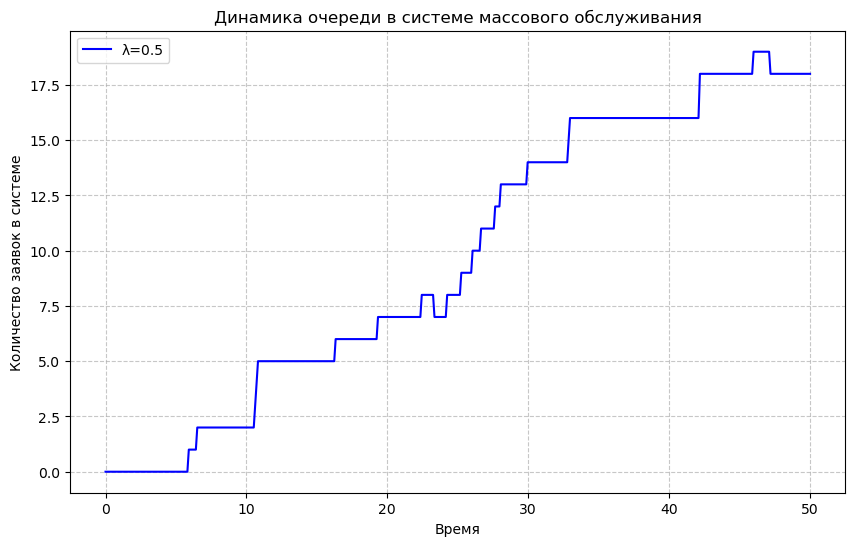

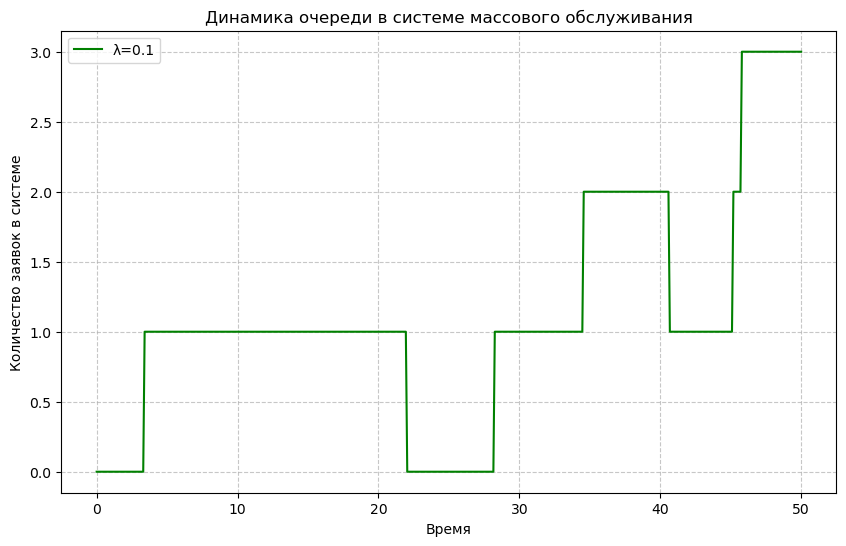

In [18]:
def simulate_queue(lam, T, grid_size):
    num_requests = np.random.poisson(lam * T)
    arrival_times = np.sort(np.random.uniform(0, T, num_requests))
    service_times = np.random.chisquare(df=10, size=num_requests)
    end_times = np.zeros(num_requests)
    end_times[0] = arrival_times[0] + service_times[0]

    for i in range(1, num_requests):
        if arrival_times[i] >= end_times[i - 1]:
            end_times[i] = arrival_times[i] + service_times[i]
        else:
            end_times[i] = end_times[i - 1] + service_times[i]

    grid = np.linspace(0, T, grid_size)
    queue_lengths = np.zeros(grid_size)

    for i, time_point in enumerate(grid):
        active_requests = ((arrival_times <= time_point) & (end_times > time_point)).sum()
        queue_lengths[i] = active_requests

    return grid, queue_lengths

T = 50
lam = 0.5
grid_size = 500
grid, queue_lengths = simulate_queue(lam, T, grid_size)

plt.figure(figsize=(10, 6))
plt.plot(grid, queue_lengths, label=f"λ={lam}", color='blue')
plt.title("Динамика очереди в системе массового обслуживания")
plt.xlabel("Время")
plt.ylabel("Количество заявок в системе")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

lam = 0.1
grid, queue_lengths = simulate_queue(lam, T, grid_size)

plt.figure(figsize=(10, 6))
plt.plot(grid, queue_lengths, label=f"λ={lam}", color='green')
plt.title("Динамика очереди в системе массового обслуживания")
plt.xlabel("Время")
plt.ylabel("Количество заявок в системе")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


Результатом симуляции является график, отображающий динамику очереди во времени. Видно, как интенсивность поступления заявок ($\lambda$) влияет на поведение системы. При увеличении $\lambda$ возрастает вероятность накопления очереди.

Модель СМО позволяет:
- Анализировать влияние интенсивности заявок и времени обработки на динамику очереди.
- Оптимизировать параметры системы для предотвращения перегрузок.
- Прогнозировать поведение системы при различных нагрузках.


## 11.2 
Система массового обслуживания с циклической интенсивностью $ \lambda(1 + \cos(t)) $ и единичными скачками. 
При помощи метода Льюиса и Шедлеара, свести задачу моделирования неоднородного пуассоновского процесса к моделированию двумерного пуассоновского поля, где первая координата распределена равномерно, а вторая имеет распределение Бернулли.

Требуется смоделировать систему массового обслуживания, где интенсивность поступления заявок изменяется циклически:
$$
\lambda(t) = \lambda(1 + \cos(t)).
$$

Для этого используется метод Льюиса и Шедлеара, который позволяет свести задачу моделирования неоднородного пуассоновского процесса к двумерному пуассоновскому полю:
1. **Первая координата**: равномерное распределение времён поступления заявок.
2. **Вторая координата**: распределение Бернулли для принятия/отбрасывания событий в зависимости от реальной интенсивности $\lambda(t)$.

Метод Льюиса и Шедлеара
1. **Генерация однородного пуассоновского процесса**:
   - Определяется максимальная интенсивность $\lambda_{\text{max}}$, в данном случае $\lambda_{\text{max}} = 2\lambda$.
   - Генерируются события равномерно распределённые по времени для максимальной интенсивности.

2. **Фильтрация событий**:
   - Каждое событие проверяется через вероятность принятия:
     $$
     P = \frac{\lambda(t)}{\lambda_{\text{max}}} = \frac{1 + \cos(t)}{2}.
     $$
   - Для этого используется распределение Бернулли.

3. **Распределение событий**:
   - После фильтрации остаются только те события, которые соответствуют реальной интенсивности $\lambda(t)$.

4. **Моделирование времени обслуживания**:
   - Для каждого события генерируется время обслуживания из $\chi^2(10)$.
   - Рассчитывается момент окончания обработки заявки.



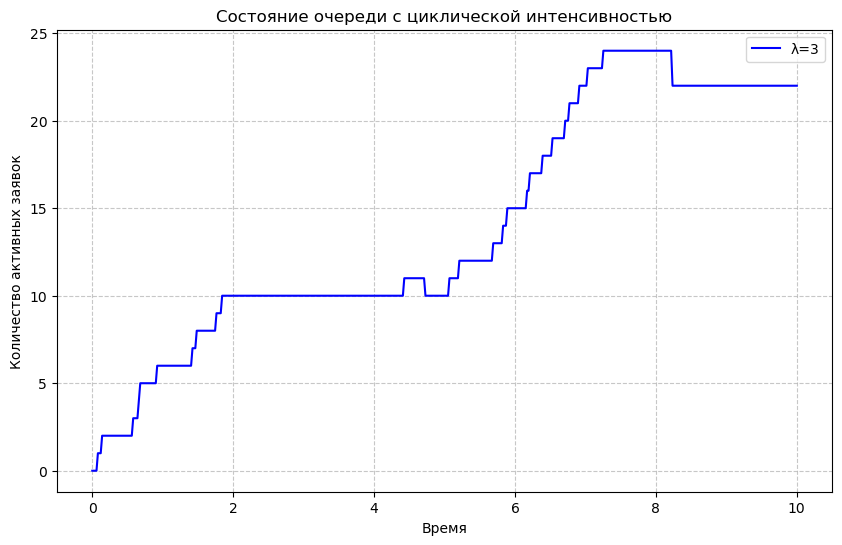

In [19]:
def cyclic_intensity_queue(lam, T, grid_size):
    n = np.random.poisson(2 * lam * T)
    arrival_times = np.sort(np.random.uniform(0, T, n))

    intensity_function = lambda t: (1 + np.cos(t)) / 2
    acceptance_probabilities = intensity_function(arrival_times)
    is_accepted = np.random.uniform(0, 1, n) < acceptance_probabilities
    filtered_times = arrival_times[is_accepted]

    service_times = np.random.chisquare(df=10, size=len(filtered_times))
    end_times = np.maximum.accumulate(filtered_times + service_times)

    grid = np.linspace(0, T, grid_size)
    queue_sizes = np.array([
        np.sum((filtered_times <= time_point) & (end_times > time_point))
        for time_point in grid
    ])

    return grid, queue_sizes
T = 10
lam = 3
grid_size = 500

grid, queue_sizes = cyclic_intensity_queue(lam, T, grid_size)

plt.figure(figsize=(10, 6))
plt.plot(grid, queue_sizes, label=f"λ={lam}", color='blue')
plt.title("Состояние очереди с циклической интенсивностью")
plt.xlabel("Время")
plt.ylabel("Количество активных заявок")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Моделирование неоднородного процесса сводится к двумерному полю:
1. **Первая координата**: моменты поступления заявок ($t$), равномерно распределённые.
2. **Вторая координата**: распределение Бернулли, определяющее принятие/отбрасывание заявок.

- С помощью временной сетки определяется состояние системы (количество активных заявок) на каждом шаге.
- График показывает циклические колебания нагрузки, соответствующие изменению интенсивности $\lambda(t)$.


## 11.3
Работа страховой компании: 
   Первая координата — момент наступления страхового случая (равномерное распределение), вторая — величина ущерба (распределение Парето). Поступление капитала считать линейным по времени со скоростью $ c > 0 $, начальный капитал $ W > 0 $.


Цель — моделировать динамику капитала компании, учитывая случайные страховые случаи с убытками, распределёнными по закону Парето, и линейное поступление капитала.

1. **Убытки**: страховые случаи генерируются как пуассоновский процесс с интенсивностью $\lambda$. Размер убытков ($\tau$) следует распределению Парето:
   $$
   \tau = \frac{b}{U^{1/a}}, \quad U \sim \text{Uniform}(0, 1),
   $$
   где $a$ — параметр формы, $b$ — параметр масштаба.
2. **Поступления**: капитал увеличивается линейно со скоростью $c$.
3. **Капитал**: рассчитывается как:
   $$
   W(t) = \omega + c \cdot t - \text{убытки}(t),
   $$
   где $\omega$ — начальный капитал. При $W(t) < 0$ капитал обнуляется (банкротство).

Модель позволяет анализировать устойчивость компании при разных параметрах и оценивать риск банкротства.


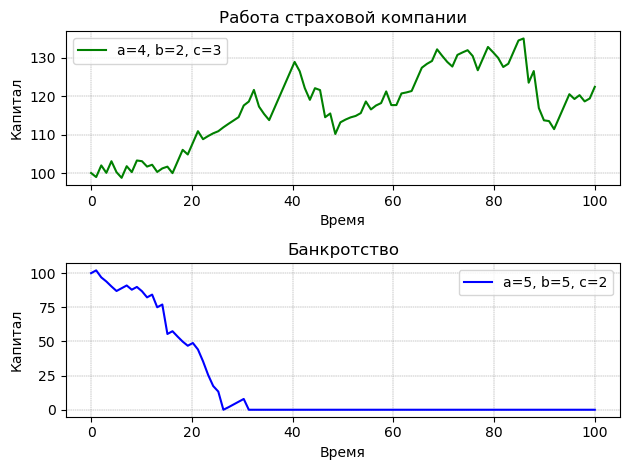

In [20]:
def insurance_simulating(lam, T, grid_size, a, b, c, omega):
    n = np.random.poisson(lam * T)
    claim_times = np.sort(np.random.uniform(0, T, n))

    claim_amounts = b / (np.random.uniform(0.0, 1.0, n)) ** (1 / a)

    grid = np.linspace(0, T, grid_size)
    cumulative_losses = np.array([
        np.sum(claim_amounts[claim_times <= time_point]) for time_point in grid
    ])

    W = omega + c * grid - cumulative_losses
    W[W < 0] = 0

    return grid, W

T = 100
lam = 1
omega = 100
grid_size = 100

a = 4
b = 2
c = 3
grid, W = insurance_simulating(lam, T, grid_size, a, b, c, omega)
plt.subplot(2, 1, 1)
plt.plot(grid, W, color='green', alpha=1, label=f"a={a}, b={b}, c={c}")
plt.title("Работа страховой компании")
plt.xlabel("Время")
plt.ylabel("Капитал")
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.legend()

a = 5
b = 5
c = 2
grid, W = insurance_simulating(lam, T, grid_size, a, b, c, omega)
plt.subplot(2, 1, 2)
plt.plot(grid, W, color='blue', alpha=1, label=f"a={a}, b={b}, c={c}")
plt.title("Банкротство")
plt.xlabel("Время")
plt.ylabel("Капитал")
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 1])